In [59]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc
import warnings
warnings.filterwarnings('ignore')

In [60]:
# Reading the csv files
df=pd.read_csv('SBI_Life_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


# Data Exploration (exploratory data analysis or EDA)


In [61]:
#Display The head ==> To Check if Data is Properly Imported
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [62]:
#To check the shape of the dataset
df.shape # (rows, columns)

(1338, 8)

In [63]:
#features in data
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [64]:
#checking datatypes
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [65]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [66]:
#Lets describe the dataset
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


According to Described Information:
All Features are not Normally Distributed( Theortically if feature is normally distributed, Mean = Median = Mode ).
,But Features are close to Normality,
mean is higher than the median, which means  data is right skewed and ouliers are present

In [67]:
# Are there any missing values?
df.isna().sum()


age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [68]:
#number of unique value in each features
for col in df.columns.values:
    print("number of unique valuse of {} : {}".format(col, df[col].nunique()))

number of unique valuse of age : 47
number of unique valuse of sex : 2
number of unique valuse of bmi : 548
number of unique valuse of children : 6
number of unique valuse of smoker : 2
number of unique valuse of region : 4
number of unique valuse of charges : 1337
number of unique valuse of insuranceclaim : 2


In [69]:
#lets check the correlation matrix
df.corr()
#Here correlation between column "smoker" ,"charges" and "bmi" are quite significant

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


### Univariate  Analysis

In [70]:
# Let's find out how many of each class there
df['insuranceclaim'].value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

In [71]:
#Sex percentage in dataset
print('Percentage',df.insuranceclaim.value_counts(normalize=True))

Percentage 1    0.585202
0    0.414798
Name: insuranceclaim, dtype: float64


Text(0.5, 6.800000000000004, '0 = No claim , 1 = Claim')

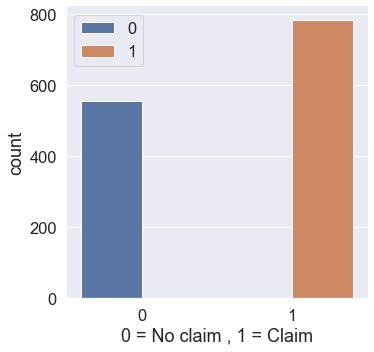

In [72]:
#Lets check the count of each class in target varaible
%matplotlib inline
sns.catplot(x='insuranceclaim',data=df,kind='count',hue='insuranceclaim')
plt.legend()
plt.xlabel("0 = No claim , 1 = Claim")
#here we we see data is imbalanced but both the classes have significant number of instances

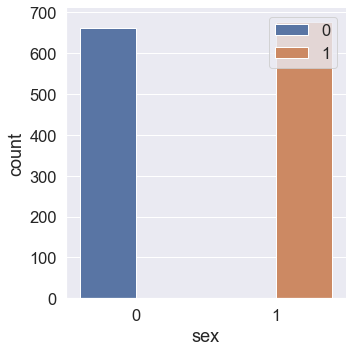

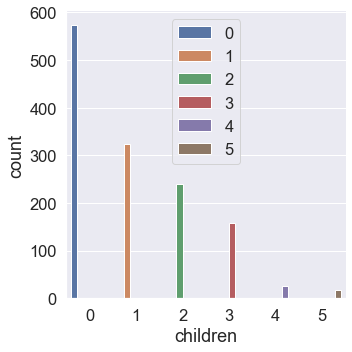

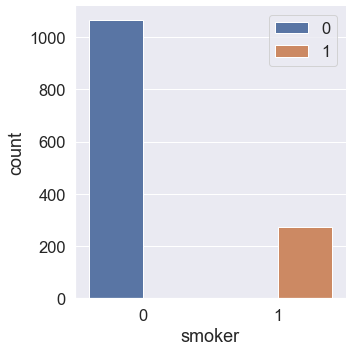

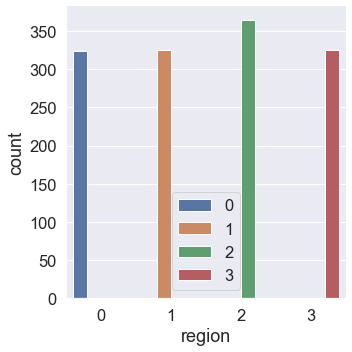

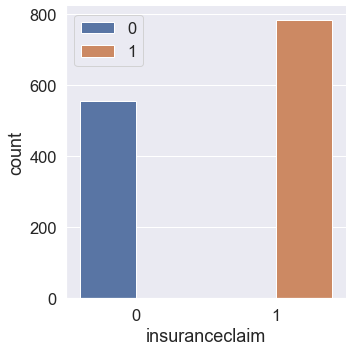

In [73]:
# Function to Count number of persons for each attributes given in the dataset....
model=df.drop(['charges','bmi','age',],axis=1)
models=model.columns.values
sns.set_style("darkgrid")
for i in models:
    sns.catplot(x=i,data=df,kind='count',hue=i)
    #plt.layout(4,4)
    plt.legend()
    plt.tight_layout()


age                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
sex               AxesSubplot(0.398529,0.657941;0.227941x0.222059)
bmi               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
children             AxesSubplot(0.125,0.391471;0.227941x0.222059)
smoker            AxesSubplot(0.398529,0.391471;0.227941x0.222059)
region            AxesSubplot(0.672059,0.391471;0.227941x0.222059)
charges                 AxesSubplot(0.125,0.125;0.227941x0.222059)
insuranceclaim       AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

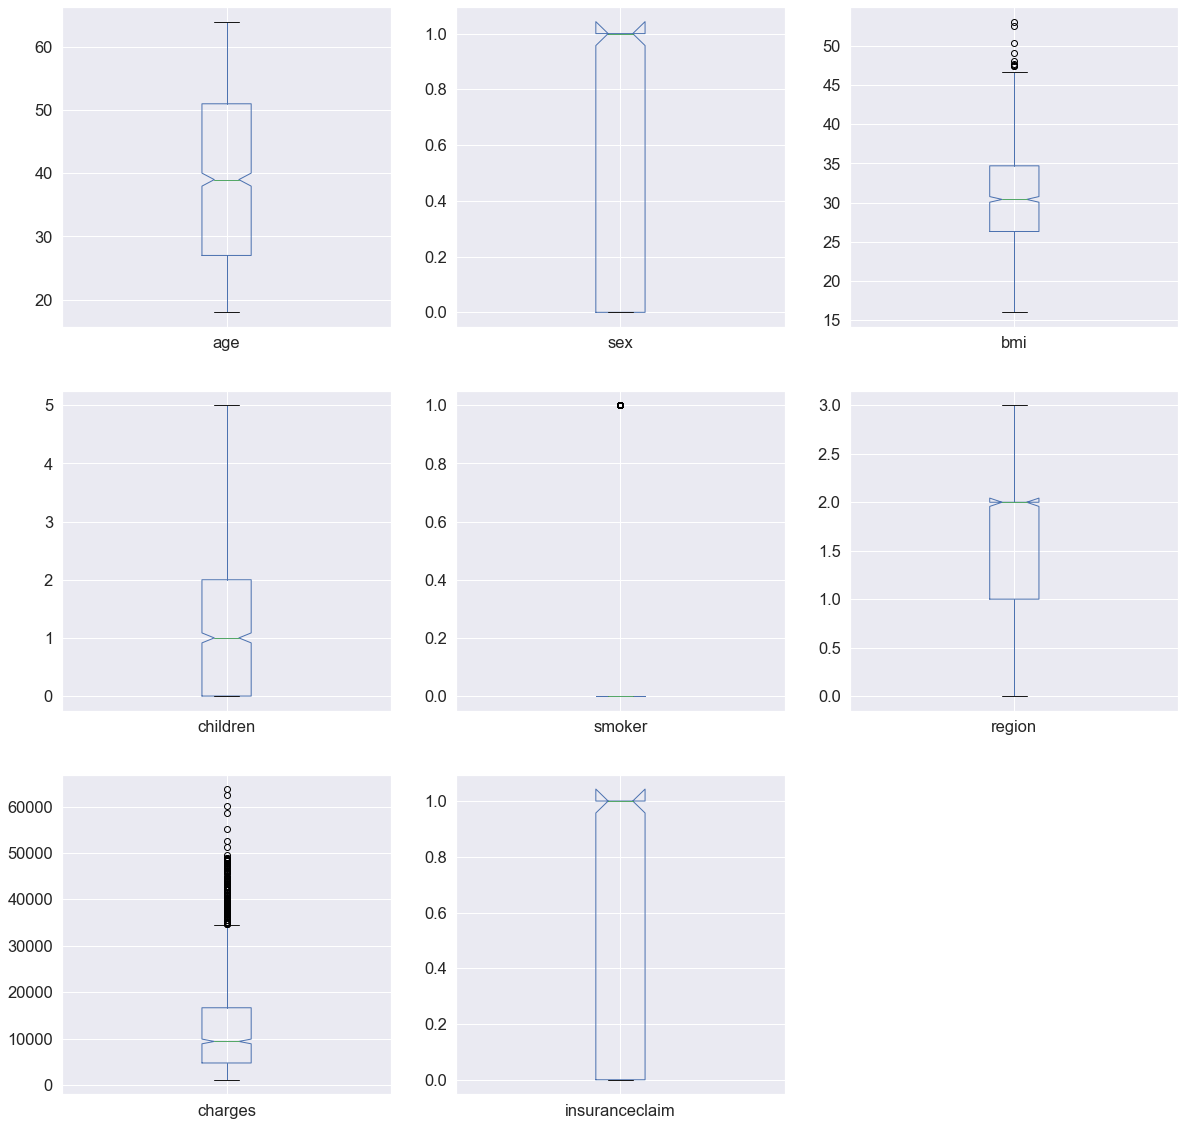

In [74]:
# Plotting the boxplot in order to check few statistical values and outliers
df.plot(kind='box', subplots=True, layout=(3,3),figsize=(20,20),grid=True,notch=True)

outliers are present in charges,bmi and smoker

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C6997021C8>,
      dtype=object)

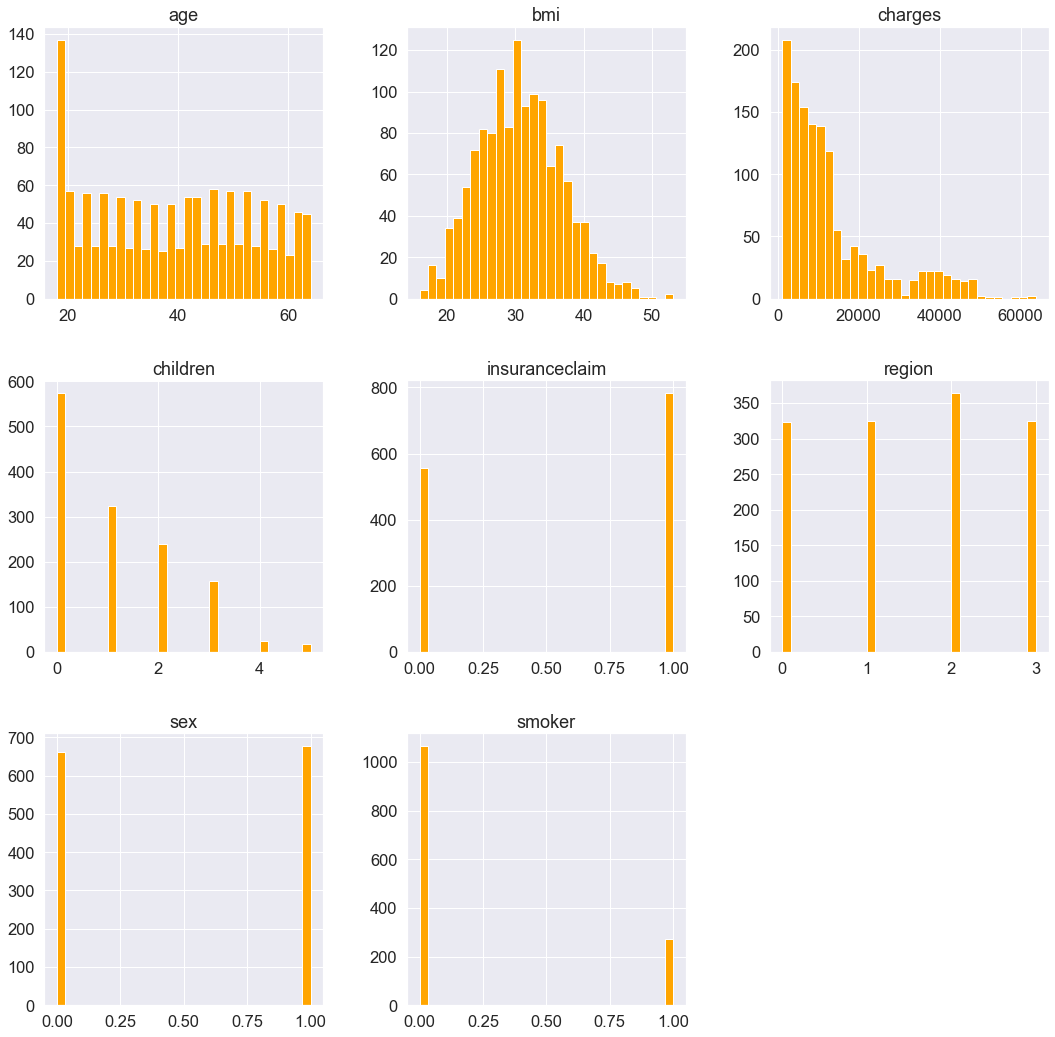

In [75]:
#plotting histograms for checking normal distribution
df.hist(figsize=(18,18),grid=True,layout=(3,3),bins=30,color='orange')

### Bivariate  Analysis

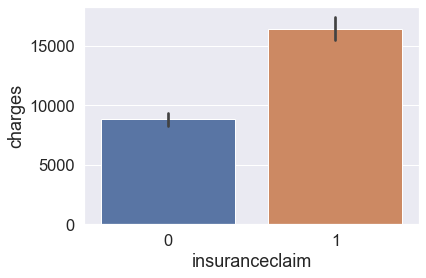

In [76]:
#Lets compare the average charges who claimed with average charges who didnt
sns.barplot(x="insuranceclaim",y="charges",data=df)
plt.show()

In [77]:
# Compare target column with sex column
pd.crosstab(df.sex, df.insuranceclaim)

insuranceclaim,0,1
sex,,
0,285,377
1,270,406


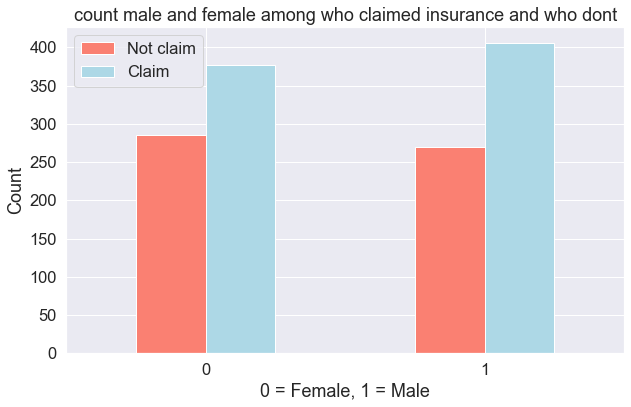

In [78]:
# Create a plot of crosstab
pd.crosstab(df.sex, df.insuranceclaim).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("count male and female among who claimed insurance and who dont")
plt.xlabel("0 = Female, 1 = Male")
plt.ylabel("Count")
plt.legend(["Not claim", "Claim"]);
plt.xticks(rotation=0);

Highest number of claims are from  Male as campered to females

In [79]:
# Compare target column with Region column
pd.crosstab(df.region, df.insuranceclaim)

insuranceclaim,0,1
region,,
0,132,192
1,162,163
2,119,245
3,142,183


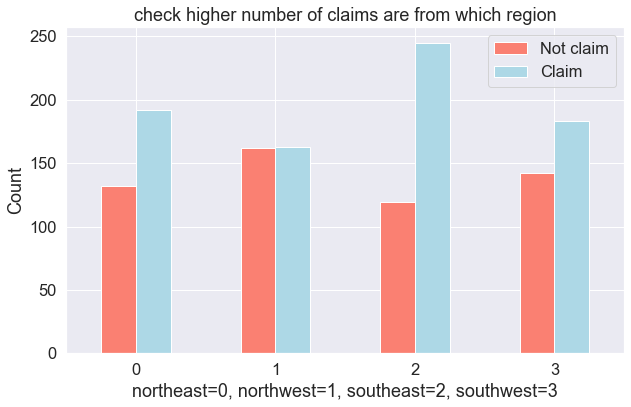

In [80]:
# Create a plot of crosstab
pd.crosstab(df.region, df.insuranceclaim).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("check higher number of claims are from which region")
plt.xlabel("northeast=0, northwest=1, southeast=2, southwest=3")
plt.ylabel("Count")
plt.legend(["Not claim", "Claim"]);
plt.xticks(rotation=0);

Highest number of claims are from region 2

In [81]:
# Compare target column with sex column
pd.crosstab(df.smoker, df.insuranceclaim)

insuranceclaim,0,1
smoker,,
0,530,534
1,25,249


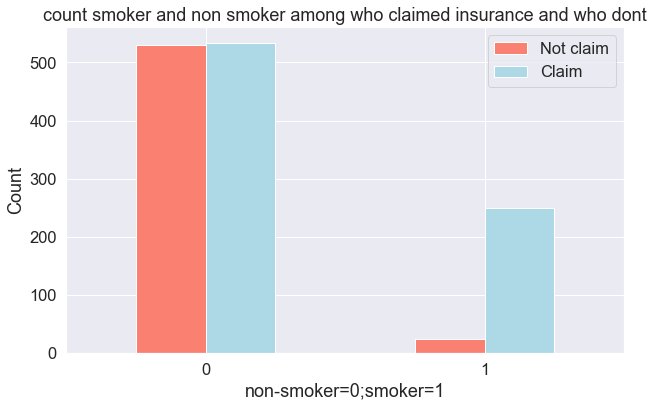

In [82]:
# Create a plot of crosstab
pd.crosstab(df.smoker, df.insuranceclaim).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("count smoker and non smoker among who claimed insurance and who dont")
plt.xlabel("non-smoker=0;smoker=1")
plt.ylabel("Count")
plt.legend(["Not claim", "Claim"]);
plt.xticks(rotation=0);

Highest number of claims are from non-smoker

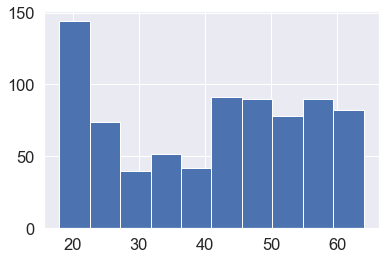

In [83]:
#we will check in which age interval claims are high
plt.hist(x="age",data=df.loc[df["insuranceclaim"]==1])
plt.show()

In [84]:
# Compare target column with sex column
pd.crosstab(df.children, df.insuranceclaim)

insuranceclaim,0,1
children,,
0,111,463
1,151,173
2,146,94
3,112,45
4,21,4
5,14,4


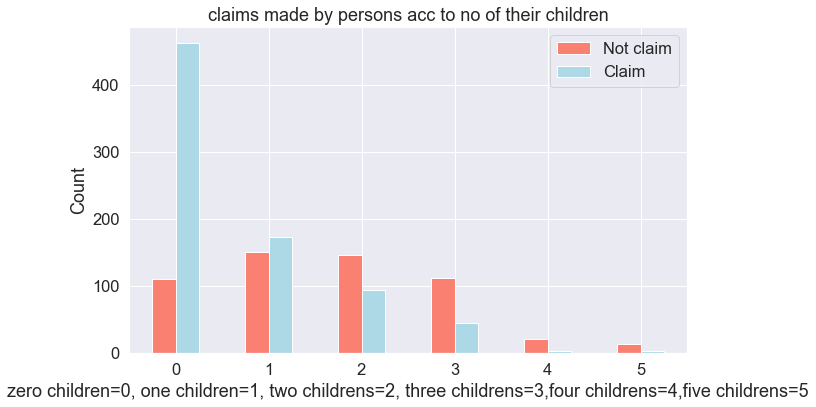

In [85]:
# Create a plot of crosstab
pd.crosstab(df.children, df.insuranceclaim).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("claims made by persons acc to no of their children")
plt.xlabel("zero children=0, one children=1, two childrens=2, three childrens=3,four childrens=4,five childrens=5")
plt.ylabel("Count")
plt.legend(["Not claim", "Claim"]);
plt.xticks(rotation=0);

Claims made by persons who dont have a children are higher than who have children

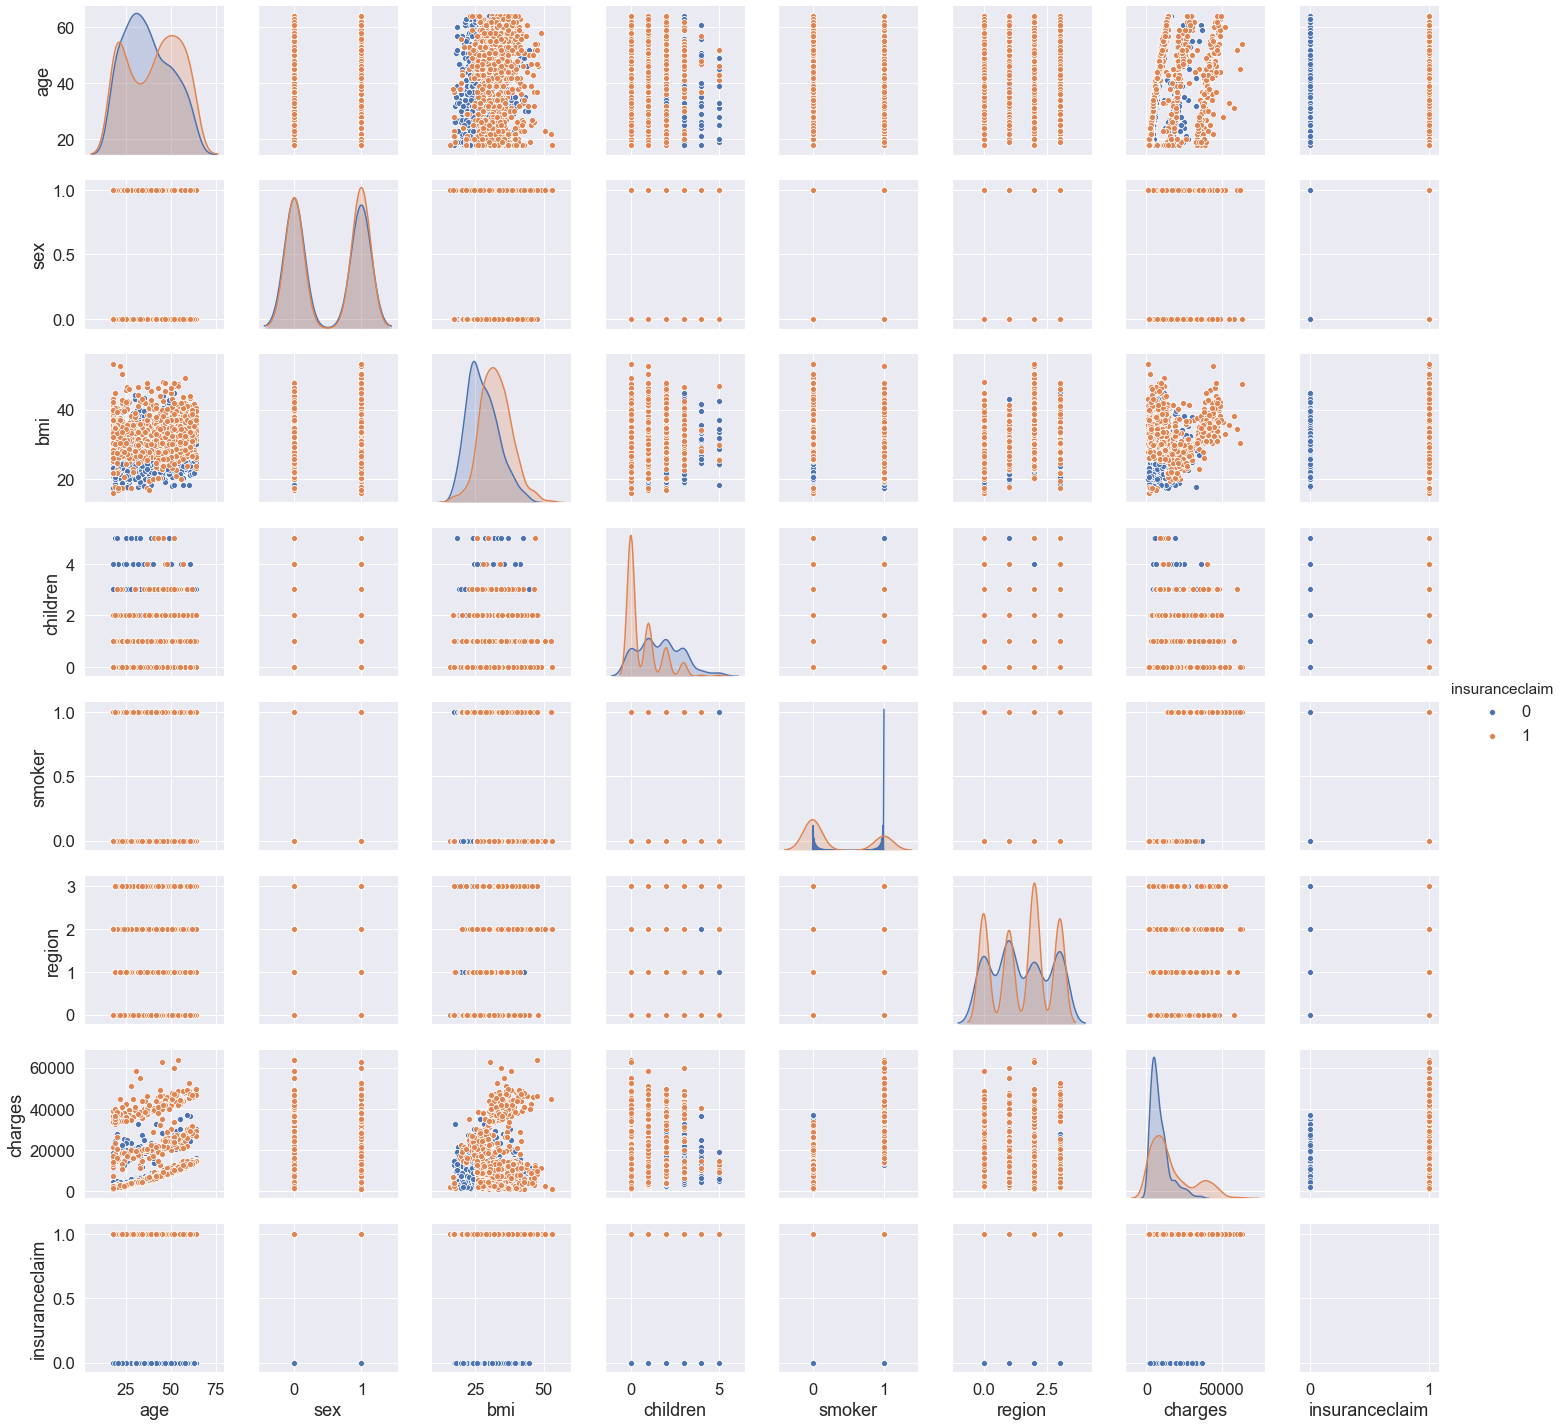

In [86]:
# Plotting the pairplot to analyze correlation between fields
sns.pairplot(df,hue='insuranceclaim')

(8.0, 0.0)

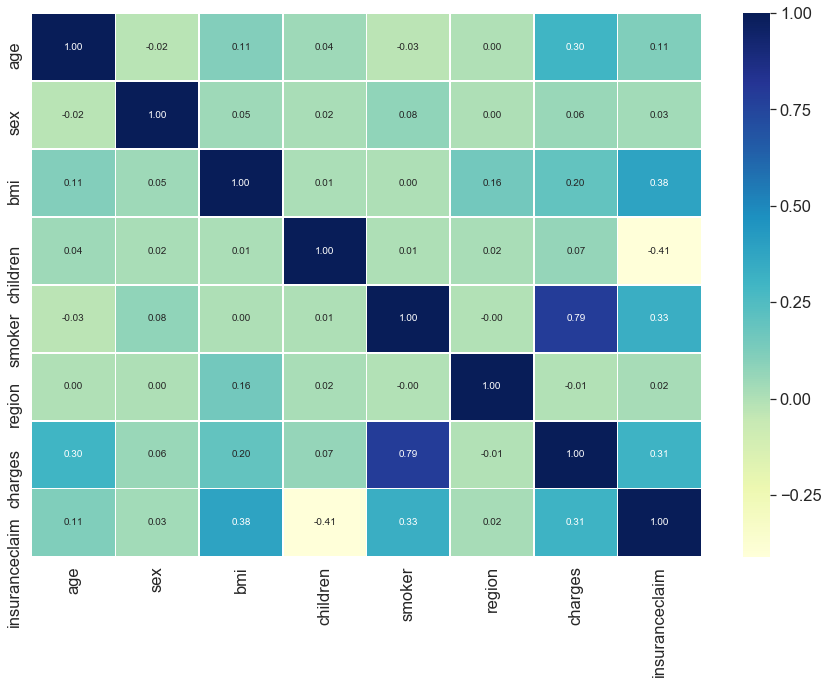

In [87]:
# Plotting Heatmap for Correlation
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [88]:
#checking skewness values
df.skew()
#From below output it is clear that skewness exist

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.938380
smoker            1.464766
region           -0.038101
charges           1.515880
insuranceclaim   -0.346254
dtype: float64

In [89]:
#lets remove the skewness
for i in df.columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [90]:
#lets again check the skewness
df.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.264083
smoker            1.464766
region           -0.038101
charges          -0.089817
insuranceclaim   -0.346254
dtype: float64

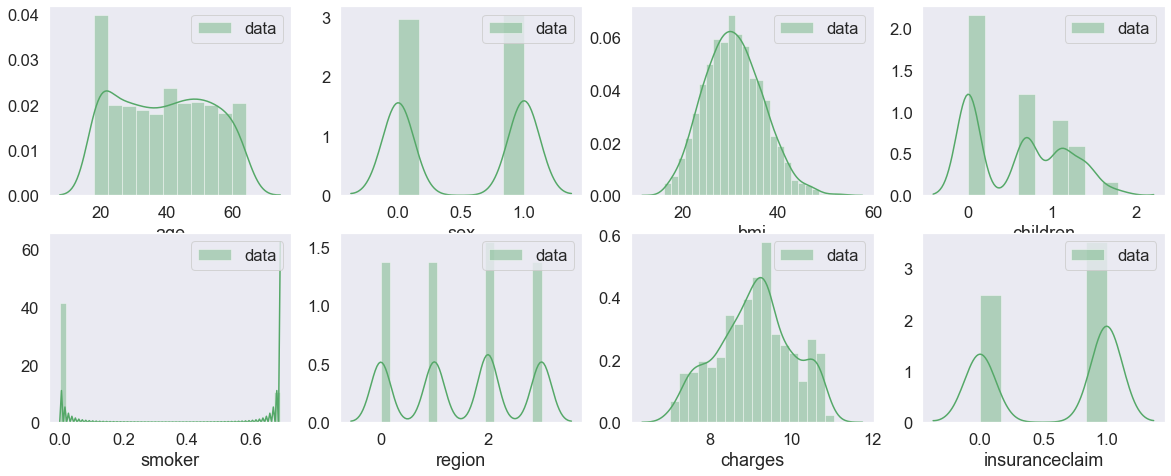

In [91]:
# Checking the Normal Distribution using distplot after removing skewness
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(4,4,i+1)
    sns.distplot(df[col],color='g',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout

In [92]:
#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df))
print(df.shape)#shape of dataset before outliers remove
df_sbi=df.loc[(z<3).all(axis=1)]
print(df_sbi.shape)#shape of dataset after outliers removed

(1338, 8)
(1334, 8)


In [93]:
#lets again check the skewness after removing outliers
df_sbi.skew()

age               0.053603
sex              -0.015010
bmi               0.205622
children          0.262249
smoker            1.465804
region           -0.034385
charges          -0.088016
insuranceclaim   -0.341053
dtype: float64

# Modeling


In [94]:
# Split data into X and y
X = df_sbi.drop("insuranceclaim", axis=1)

y = df_sbi["insuranceclaim"]

In [95]:
# Independent variables (no target column)
X.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0.000000,0.693147,3,9.734236
1,18,1,33.770,0.693147,0.000000,2,7.453882
2,28,1,33.000,1.386294,0.000000,2,8.400763
3,33,1,22.705,0.000000,0.000000,1,9.998137
4,32,1,28.880,0.000000,0.000000,1,8.260455


In [96]:
# Target variable
y


0       1
1       1
2       0
3       0
4       1
       ..
1333    0
1334    1
1335    1
1336    0
1337    1
Name: insuranceclaim, Length: 1334, dtype: int64

In [97]:
#checking shape of input variable
X.shape

(1334, 7)

In [98]:
#checking shape of target variable
y.shape

(1334,)

In [99]:
#lets bring all features to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)
x

,age,sex,bmi,children,smoker,region,charges
0,-1.442249,-1.007525,-0.450359,-1.042928,1.971407,1.343594,0.691735
1,-1.513528,0.992532,0.528191,0.198200,-0.507252,0.439278,-1.795147
2,-0.800739,0.992532,0.399829,1.439329,-0.507252,0.439278,-0.762508
3,-0.444344,0.992532,-1.316383,-1.042928,-0.507252,-0.465038,0.979538
4,-0.515623,0.992532,-0.286989,-1.042928,-0.507252,-0.465038,-0.915523
...,...,...,...,...,...,...,...
1329,0.767397,0.992532,0.061421,1.439329,-0.507252,-0.465038,0.184097
1330,-1.513528,-1.007525,0.219789,-1.042928,-0.507252,-1.369355,-1.527414
1331,-1.513528,-1.007525,1.041637,-1.042928,-0.507252,0.439278,-1.857348
1332,-1.299692,-1.007525,-0.800436,-1.042928,-0.507252,1.343594,-1.629944


In [100]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def maxrandomcore(model,x,y):
    max_acc_score=0
    for acc_state in range(42,100): 
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=0.22,stratify=y)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        accuracy_score1=accuracy_score(y_test,y_pred)
        if accuracy_score1 > max_acc_score:
            max_acc_score=accuracy_score1
            final_acc_state=acc_state
    print('max acc score corresponding to',final_acc_state,'is:', max_acc_score)
    return final_acc_state

In [101]:
# Evaluate the model on the training set
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.naive_bayes import MultinomialNB
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "GaussianNB":GaussianNB(),
          "SVC":SVC(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier()
         }

# Create a function to fit and score models
def fit_and_score(models):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        acc_state=maxrandomcore(model,x,y)
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=.22)
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_train, y_train)
    return model_scores

In [102]:

model_scores = fit_and_score(models=models)

model_scores


max acc score corresponding to 96 is: 0.9047619047619048
max acc score corresponding to 68 is: 0.9251700680272109
max acc score corresponding to 73 is: 0.9727891156462585
max acc score corresponding to 97 is: 0.8333333333333334
max acc score corresponding to 80 is: 0.9285714285714286
max acc score corresponding to 44 is: 0.9965986394557823
max acc score corresponding to 97 is: 1.0


{'Logistic Regression': 0.8778846153846154,
 'KNN': 0.9336538461538462,
 'Random Forest': 0.9913461538461539,
 'GaussianNB': 0.7951923076923076,
 'SVC': 0.9201923076923076,
 'DecisionTreeClassifier': 1.0,
 'GradientBoostingClassifier': 0.9875}

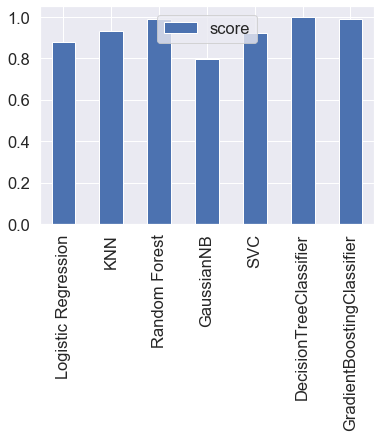

In [103]:
#Plotting bar plot of scores of various models
model_compare = pd.DataFrame(model_scores, index=["score"])
model_compare.T.plot.bar()

******************** SVC *********************


max acc score corresponding to 80 is: 0.9285714285714286
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


Accuracy Score= 0.9285714285714286


Cross_val_score= 0.9025462230882498


roc_auc_score =  0.928231033168128


Classification report
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       122
           1       0.95      0.93      0.94       172

    accuracy                           0.93       294
   macro avg       0.93      0.93      0.93       294
weighted avg       0.93      0.93      0.93       294



[[113   9]
 [ 12 160]]





******************** Random Forest *********************


max acc score corresponding to 97 is: 0.9829931972789115
RandomForestClassifier(bootstrap=True, cla

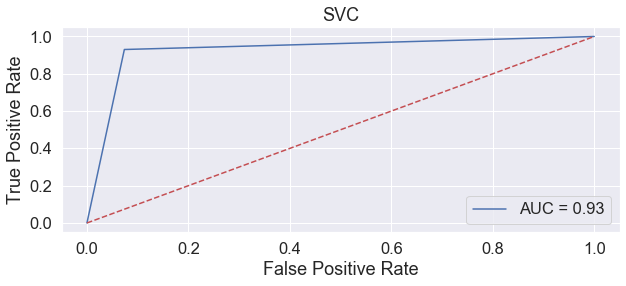

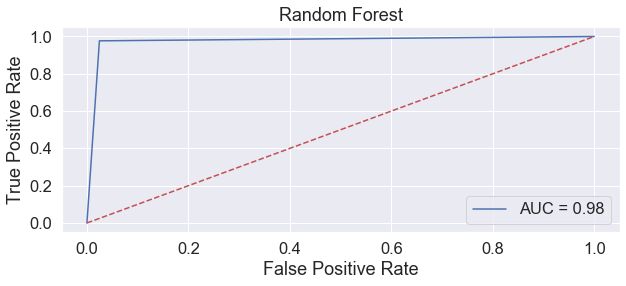

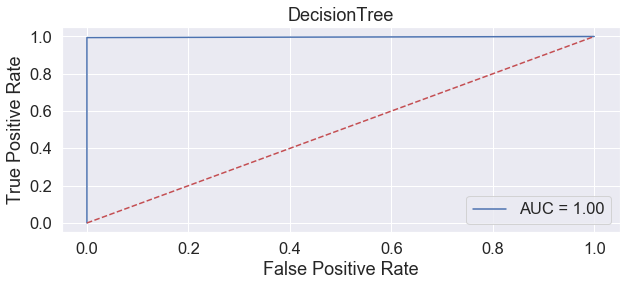

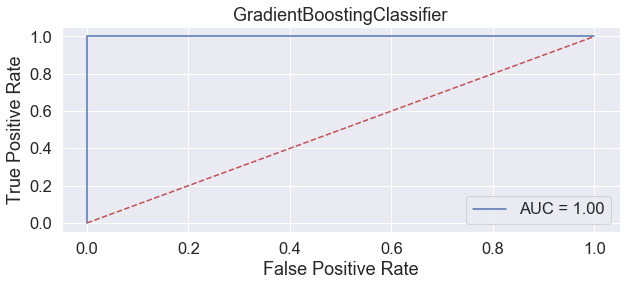

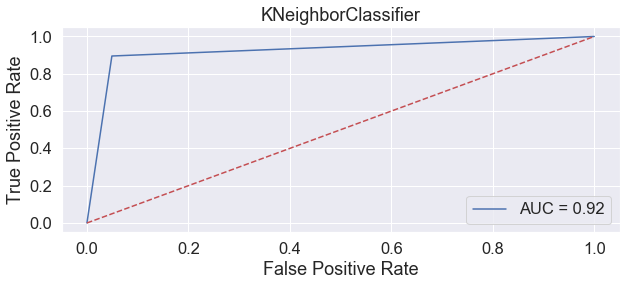

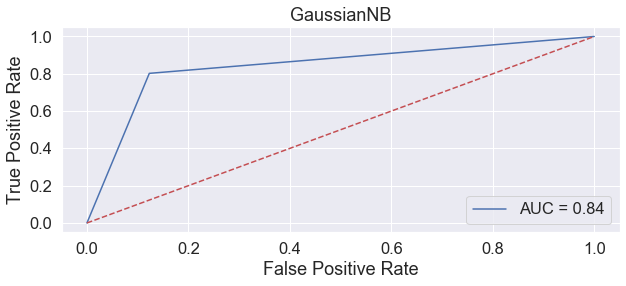

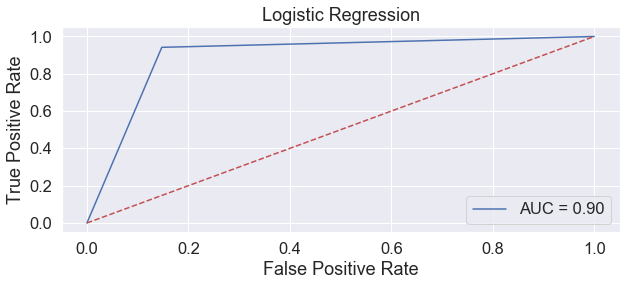

In [104]:
#Lists to store model name, Accuracy score, cross_val_score, Auc Roc score .
models =[]
models.append(("SVC",SVC()))
models.append(("Random Forest",RandomForestClassifier(n_estimators=100)))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("GradientBoostingClassifier",GradientBoostingClassifier()))    
models.append(("KNeighborClassifier",KNeighborsClassifier(n_neighbors=6)))
models.append(("GaussianNB",GaussianNB()))
models.append(("Logistic Regression",LogisticRegression()))
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print("********************",name,"*********************")
    print('\n')
    Model.append(name)
    acc_state=maxrandomcore(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=0.22,stratify=y)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy Score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label= 'AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print("\n\n")



In [105]:
#lookover the accuracy_score,Cross_val_score,Roc_auc_curve in a DataFrame which we calculated above
result=pd.DataFrame({'Model':Model,'accuracy_score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,accuracy_score,Cross_val_score,Roc_auc_curve
0,SVC,92.857143,90.254622,92.823103
1,Random Forest,97.619048,95.580139,97.607701
2,DecisionTree,99.659864,97.828527,99.709302
3,GradientBoostingClassifier,100.000000,97.900305,100.000000
4,KNeighborClassifier,91.836735,87.407018,92.308425
5,GaussianNB,83.333333,79.385931,83.968738
6,Logistic Regression,90.476190,87.102832,89.715974


In [106]:
#function to calculate accuracy,precision,recall and f1 score
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [107]:
#for getting best set of parameters for DecisionTreeClassifier we will use grid searchCV
from sklearn.model_selection import GridSearchCV
grid_3 = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

clf1 = DecisionTreeClassifier(random_state=44)

# Setup GridSearchCV
gs_clf1 = GridSearchCV(estimator=clf1,
                      param_grid=grid_3,
                      cv=5, # 3-fold cross-validation
                      verbose=2) # print out progress

# Fit the GridSearchCV
gs_clf1.fit(x, y);

Fitting 5 folds for each of 294 candidates, totalling 1470 fits
[CV] max_leaf_nodes=2, min_samples_split=2 ...........................
[CV] ............ max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=2 ...........................
[CV] ............ max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=2 ...........................
[CV] ............ max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=2 ...........................
[CV] ............ max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=2 ...........................
[CV] ............ max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=3 ...........................
[CV] ............ max_leaf_nodes=2, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=3 ...........................
[CV] ........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] max_leaf_nodes=5, min_samples_split=3 ...........................
[CV] ............ max_leaf_nodes=5, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=5, min_samples_split=3 ...........................
[CV] ............ max_leaf_nodes=5, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=5, min_samples_split=3 ...........................
[CV] ............ max_leaf_nodes=5, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=5, min_samples_split=3 ...........................
[CV] ............ max_leaf_nodes=5, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=5, min_samples_split=3 ...........................
[CV] ............ max_leaf_nodes=5, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=5, min_samples_split=4 ...........................
[CV] ............ max_leaf_nodes=5, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=5, min_samples_split=4 ...........................
[CV] ............ max_leaf_nodes=5, min_samples_split=4, total=   0.0s
[CV] 

[CV] ........... max_leaf_nodes=11, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=11, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=11, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=11, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=11, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=11, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=11, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=11, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=11, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=11, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=11, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=11, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=11, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=11, min_samples_split=4 ..........................
[CV] .

[CV] ........... max_leaf_nodes=17, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=17, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=17, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=17, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=17, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=17, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=17, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=17, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=17, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=17, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=17, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=17, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=17, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=17, min_samples_split=4 ..........................
[CV] .

[CV] ........... max_leaf_nodes=23, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=23, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=23, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=23, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=23, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=23, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=23, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=23, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=23, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=23, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=23, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=23, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=23, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=23, min_samples_split=3 ..........................
[CV] .

[CV] ........... max_leaf_nodes=28, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=28, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=28, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=28, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=28, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=29, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=29, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=29, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=29, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=29, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=29, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=29, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=29, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=29, min_samples_split=2 ..........................
[CV] .

[CV] ........... max_leaf_nodes=34, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=35, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=35, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=35, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=35, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=35, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=35, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=35, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=35, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=35, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=35, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=35, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=35, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=35, min_samples_split=3 ..........................
[CV] .

[CV] ........... max_leaf_nodes=40, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=41, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=41, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=41, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=41, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=41, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=41, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=41, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=41, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=41, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=41, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=41, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=41, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=41, min_samples_split=3 ..........................
[CV] .

[CV] ........... max_leaf_nodes=46, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=46, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=46, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=47, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=47, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=47, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=47, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=47, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=47, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=47, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=47, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=47, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=47, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=47, min_samples_split=3 ..........................
[CV] .

[CV] ........... max_leaf_nodes=52, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=52, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=52, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=52, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=52, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=52, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=52, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=52, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=52, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=53, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=53, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=53, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=53, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=53, min_samples_split=2 ..........................
[CV] .

[CV] ........... max_leaf_nodes=58, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=58, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=58, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=58, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=58, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=58, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=58, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=58, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=58, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=58, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=58, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=58, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=58, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=59, min_samples_split=2 ..........................
[CV] .

[CV] ........... max_leaf_nodes=64, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=64, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=64, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=64, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=64, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=64, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=64, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=64, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=64, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=64, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=64, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=64, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=64, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=65, min_samples_split=2 ..........................
[CV] .

[CV] ........... max_leaf_nodes=70, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=70, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=70, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=70, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=70, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=70, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=70, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=70, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=70, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=70, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=70, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=71, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=71, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=71, min_samples_split=2 ..........................
[CV] .

[CV] ........... max_leaf_nodes=76, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=76, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=76, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=76, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=76, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=76, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=76, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=77, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=77, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=77, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=77, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=77, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=77, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=77, min_samples_split=2 ..........................
[CV] .

[CV] ........... max_leaf_nodes=82, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=83, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=83, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=83, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=83, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=83, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=83, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=83, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=83, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=83, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=83, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=83, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=83, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=83, min_samples_split=3 ..........................
[CV] .

[CV] ........... max_leaf_nodes=89, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=89, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=89, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=89, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=89, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=89, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=89, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=89, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=89, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=89, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=89, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=89, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=89, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=89, min_samples_split=3 ..........................
[CV] .

[CV] ........... max_leaf_nodes=95, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=95, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=95, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=95, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=95, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=95, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=95, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=95, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=95, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=95, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=95, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=95, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=95, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=95, min_samples_split=3 ..........................
[CV] .

[Parallel(n_jobs=1)]: Done 1470 out of 1470 | elapsed:    6.0s finished


In [108]:
print("Best parameter:",gs_clf1.best_params_)
print("score:",gs_clf1.best_score_)

Best parameter: {'max_leaf_nodes': 40, 'min_samples_split': 3}
score: 0.9790104947526237


In [109]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 44,test_size=0.22,stratify=y)
dtc=DecisionTreeClassifier(max_leaf_nodes= 40,min_samples_split= 3)
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
dtc = evaluate_preds(y_test, preddtc)

Acc: 100.00%
Precision: 1.00
Recall: 1.00
F1 score: 1.00


# After all this process conclusion is that GradientBoostingClassifier is performing well.


In [110]:
#lets make our final model
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 97,test_size=0.22,stratify=y)
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict(x_test)

In [111]:
gbc = evaluate_preds(y_test, predgbc)

Acc: 100.00%
Precision: 1.00
Recall: 1.00
F1 score: 1.00


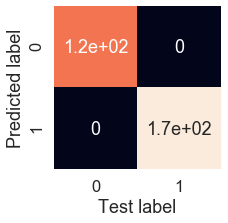

In [112]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, predgbc):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, predgbc),
                     annot=True,
                     cbar=False)
    plt.xlabel("Test label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, predgbc)

In [113]:
#lets printed confusion_matrix
print(confusion_matrix(y_test, predgbc))

[[122   0]
 [  0 172]]


In [114]:
# Printing predicted values
test=pd.DataFrame(data=y_test,)
test['Predicted values']=predgbc
test
# On the lest side values are those fields which are taken by machine for test...

,insuranceclaim,Predicted values
191,1,1
1323,1,1
158,1,1
587,1,1
271,1,1
...,...,...
93,0,0
1105,1,1
553,0,0
952,0,0


In [115]:
# Saving the Predicted values in csv file
df1=pd.DataFrame(predgbc)
df1.to_csv('Sbi_Life_Insurance_submission.csv')

In [116]:
#lets save the model using joblib
from sklearn.externals import joblib
joblib.dump(gbc,'sbi_insurance_pred.pkl')

['sbi_insurance_pred.pkl']